In [17]:
import re
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import altair as alt
import plotly.express as px
import xlrd
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import datetime

In [18]:
df = pd.read_excel("online_retail_data.xlsx", sheet_name = ["Year 2009-2010", "Year 2010-2011"]) #reading the excel file

In [19]:
df1 = df["Year 2009-2010"]
df2 = df["Year 2010-2011"]

In [20]:
df1.shape, df2.shape

((525461, 8), (541910, 8))

In [21]:
data = pd.concat([df1, df2])

In [22]:
data.shape

(1067371, 8)

In [23]:
data.isnull().sum()/data.shape[0]*100

,0
Invoice,0.000000
StockCode,0.000000
Description,0.410541
Quantity,0.000000
InvoiceDate,0.000000
Price,0.000000
Customer ID,22.766873
Country,0.000000


In [24]:
# first drop the rows where the description is null
data.dropna(axis = 0, subset = ["Description"], inplace = True)

In [25]:
data.isnull().sum() #Now let's check the data before droping these customer ID's

,0
Invoice,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
Price,0
Customer ID,238625
Country,0


In [26]:
data[data["Customer ID"].isnull()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [27]:
data.iloc[575:, :]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
576,C489524,21258,VICTORIAN SEWING BOX LARGE,-1,2009-12-01 11:48:00,12.75,15614.0,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
579,489526,85049E,SCANDINAVIAN REDS RIBBONS,12,2009-12-01 11:50:00,1.25,12533.0,Germany
580,489526,21976,PACK OF 60 MUSHROOM CAKE CASES,24,2009-12-01 11:50:00,0.55,12533.0,Germany
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [28]:
# We have to drop the rows where customer ID is null because it's a unique customer ID of each customer
# So it's better to drop rather than imputing it with some random value

data.dropna(axis = 0, subset = ["Customer ID"], inplace = True)

In [29]:
data.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


In [30]:
temp_df = data["Country"].value_counts().reset_index()

In [31]:
temp_df.head(10)

,Country,count
0,United Kingdom,741301
1,Germany,17624
2,EIRE,16195
3,France,14202
4,Netherlands,5140
5,Spain,3811
6,Belgium,3123
7,Switzerland,3064
8,Portugal,2504
9,Australia,1913


In [32]:
names  = temp_df.index

In [33]:
px.scatter(temp_df, x = "count", y = "Country", color = "Country", title = "Count of Countries")

As you can see the **United Kingdom** has the max transcations as compared to other countries. The one here to note is that the **"United Kingdom"** is the dominating class in this data which making our data looks kinda imbalanced between major class and the minority class.

You can cross check the same after de-selecting the **United Kingdom** from the above chart and see how your axis transforms.

In [34]:
#Now let's check the total quantity and by country
data.groupby("Country")["Quantity"].sum().sort_values(ascending = False).head(10)
#data.groupby("Country").sum()["Quantity"].sort_values(ascending = False).tail(10)

,Quantity
Country,
United Kingdom,8353502
Netherlands,381951
EIRE,313373
Denmark,235218
Germany,224581
France,183339
Australia,103706
Sweden,87737
Switzerland,51831


In [35]:
px.scatter(data.iloc[:, [5, 7]].groupby(["Country"]).mean(),
           y = "Price", size = "Price", title = "Average Price by Country", opacity = 0.48)

From the above dot plot we can conclude that the **Singapore** has the highest averge price followed by the **Norway** and **Malta**. Let's go deeper and see the distribution to better understand about our data.

In [36]:
countries = data["Country"].unique()

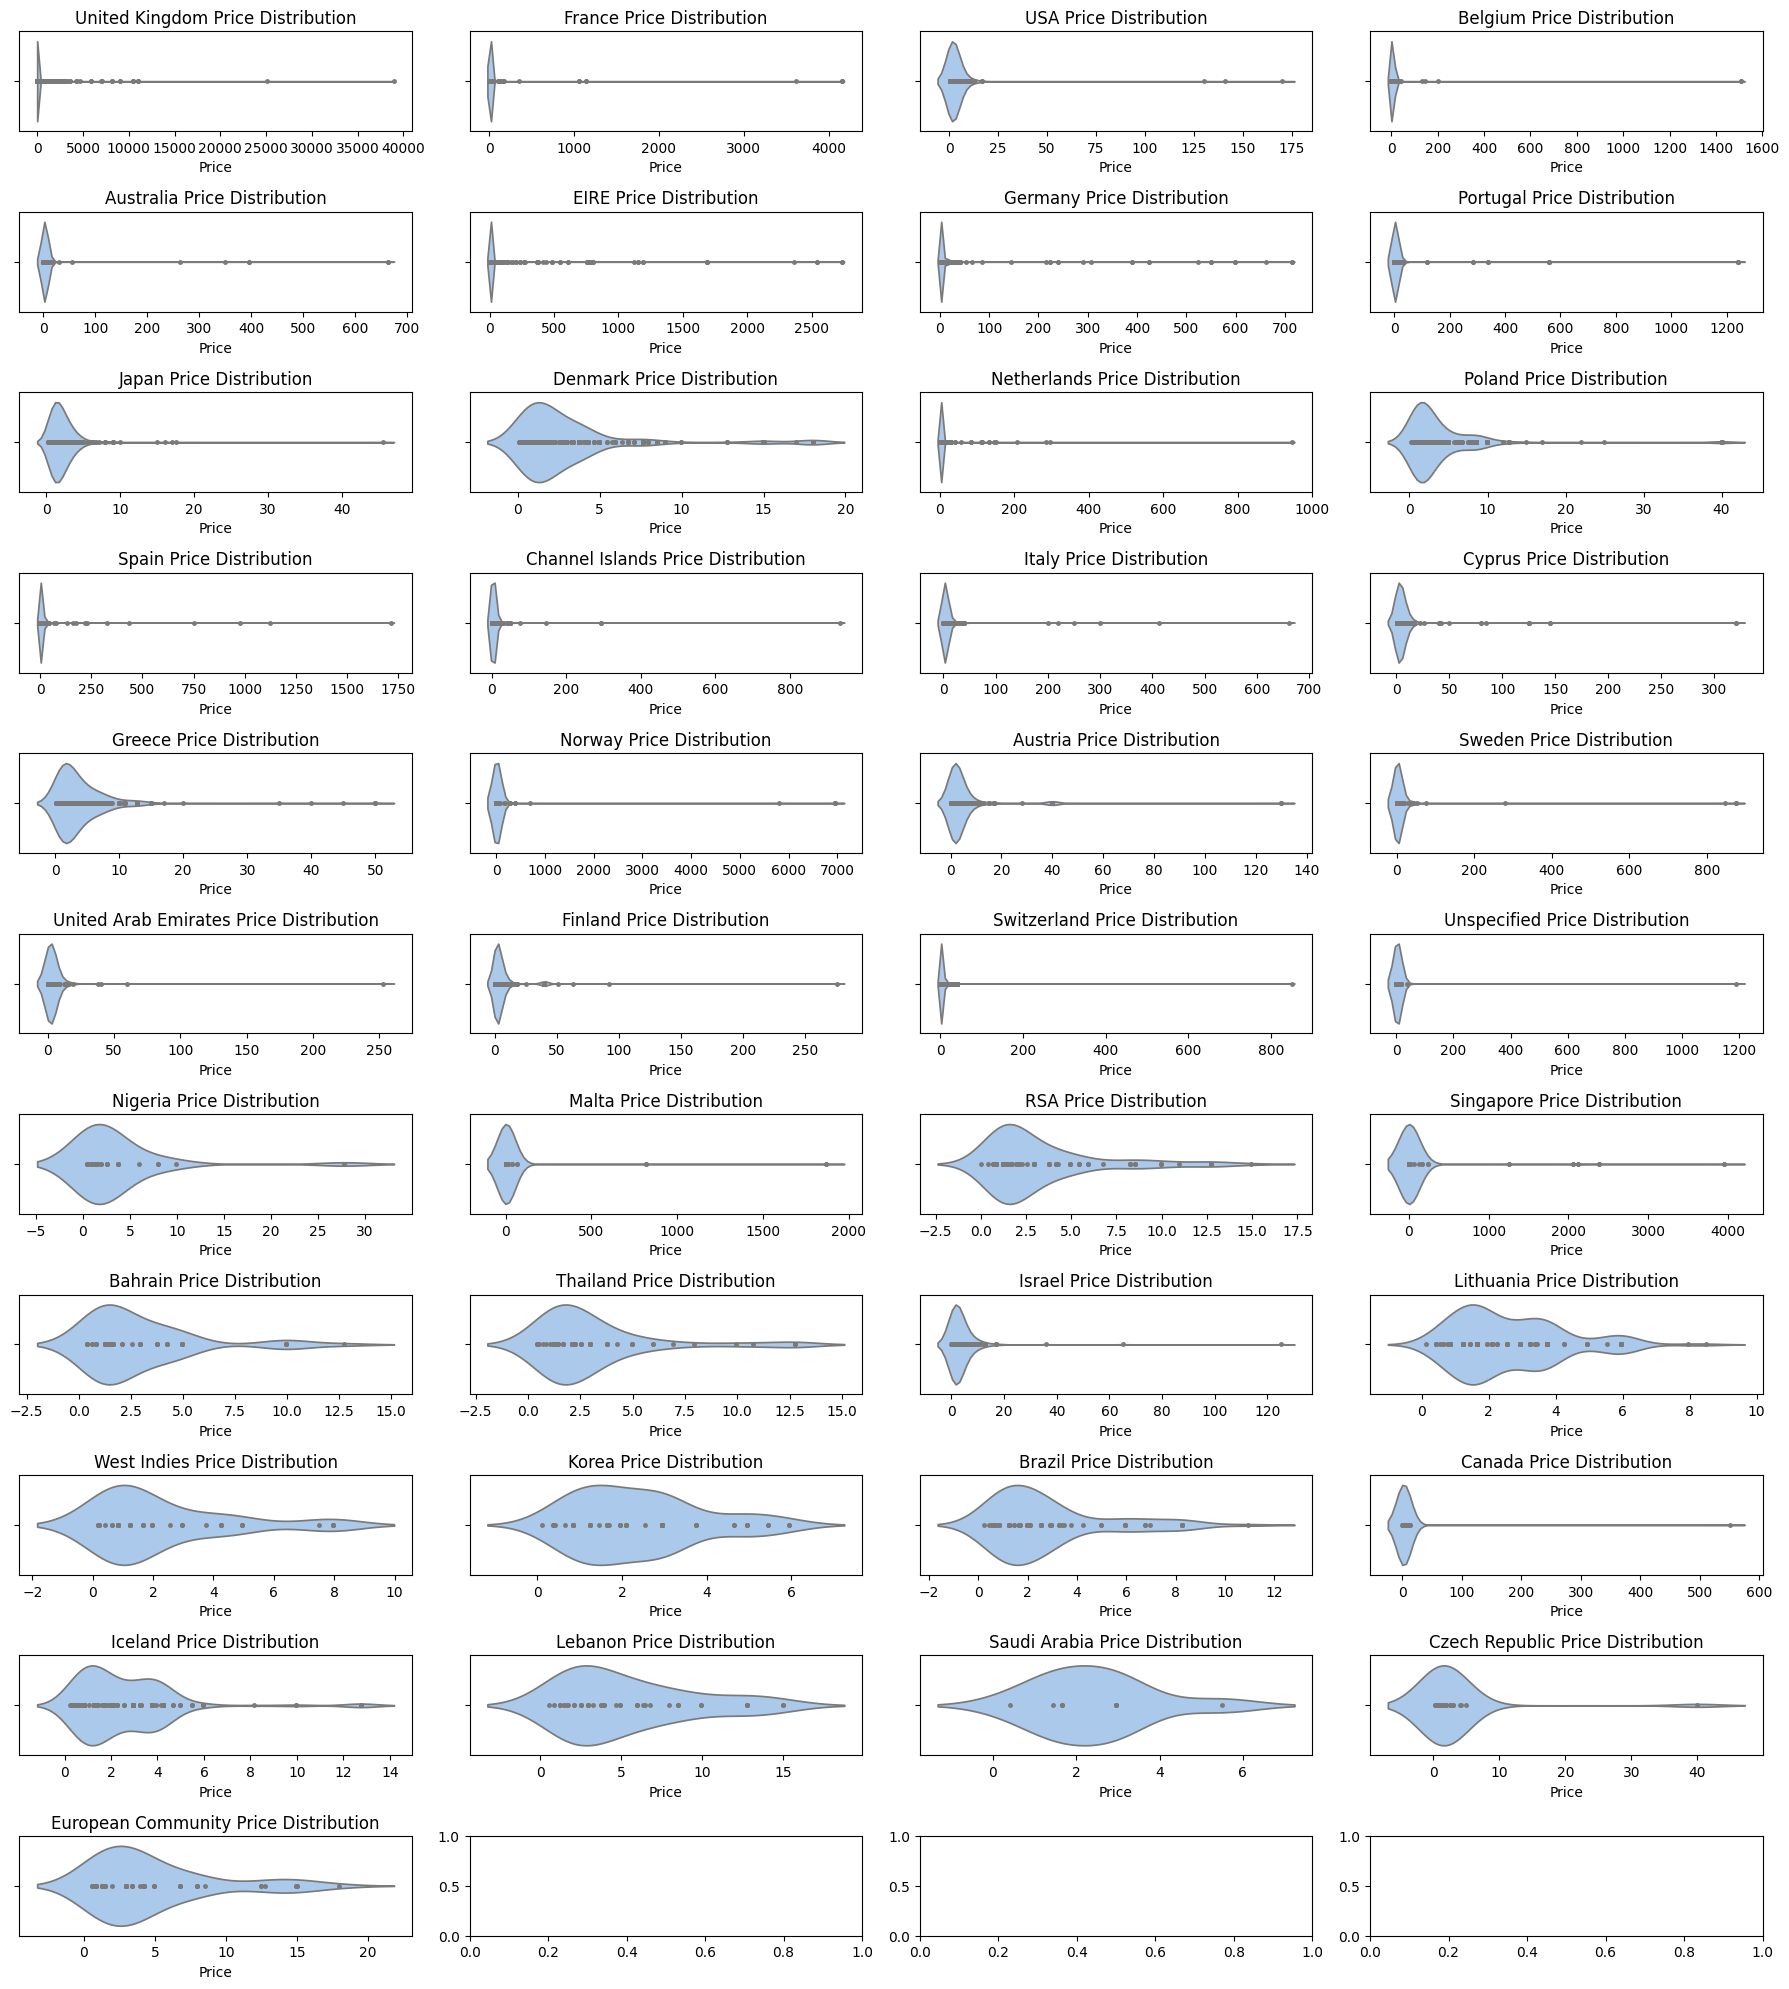

In [37]:
fig, ax = plt.subplots(11, 4, figsize=(18,20))
axes_ = [axes_row for axes in ax for axes_row in axes]

for i, c in enumerate(countries):
    sns.violinplot(x = "Price", data = data[data["Country"] == c], ax = axes_[i], inner = "point", palette = "pastel")
    axes_[i].set_title(c + ' ' + "Price Distribution")
    plt.tight_layout()

From the above plot what I can interpret is that most of the data is pretty skewed and there is lot's of high extreme values that are present in the data.

In [38]:
#Total Number of Unique Invoices
len(data["Invoice"].unique())

44876

In [39]:
temp_invoice_df = data.groupby("Invoice").sum(numeric_only=True)

In [40]:
temp_invoice_df.reset_index(inplace = True)

In [41]:
#Below are the top 30 invoices with total quantity purchased by them
temp_invoice_df.sort_values(by = "Quantity", ascending = False).head(30).iloc[:,:2].style.background_gradient(cmap = "Blues")

,Invoice,Quantity
13425,524174,87167
11080,518505,87167
3064,497946,83774
36942,581483,80995
20348,541431,74215
4379,501534,63974
2096,495194,63302
4693,502269,40000
1604,493819,25018
1047,491812,20524


In [42]:
data.groupby(["Invoice"])["Price"].mean().head(15).sort_values(ascending = False)

,Price
Invoice,
489444,141.000000
489447,130.000000
489434,4.081250
489436,3.730526
489437,3.628261
489439,3.560000
489440,3.150000
489446,3.118519
489441,3.042500


I have grouped the data by Invoice to see the average spend by Invoice Number. Here one thing interesting to see that the invoice with number **489444** & **489447** has outspent others. So to gain some better clarity, let's check these 2 invoices and get insights on how much quantity they have purchased so far.

In [43]:
data[(data["Invoice"] == 489444) | (data["Invoice"] == 489447)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.0,12636.0,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.0,12362.0,Belgium


As you can see above, These 2 invoices with invoice number **489444** and **489447** had only single transaction, that's why the average price was too high.

### **INITIAL EDA INSIGHTS:**

1) Most of the customers are from the United Kingdom followed by the Germany, EIRE & France.

2) If we check the average price sale by countries, what we have observed is that Singapore has the highest averge price sale followed by the Norway and Malta.

3) Most of the countries data is skewed when it comes to the Price feature with lots of higher extreme values.

4) There are total 44876 uniques purchased happend so far.

5) We have also observed some of the Invoices who have purchased most of the quantities within 2 year of span.

6) When it comes to the average spend there are 2 invoices with number 489444 and 489447 having the highest average spent but upon inspection we also found the average product purchase was only 1 which is from USA followed by Belgium.

In [44]:
#Let's look at the data once again & see what else insights we can get from the data itself
data.head(15)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


### **Exploratory Data Analysis Continued.....**



<Axes: xlabel='Description'>

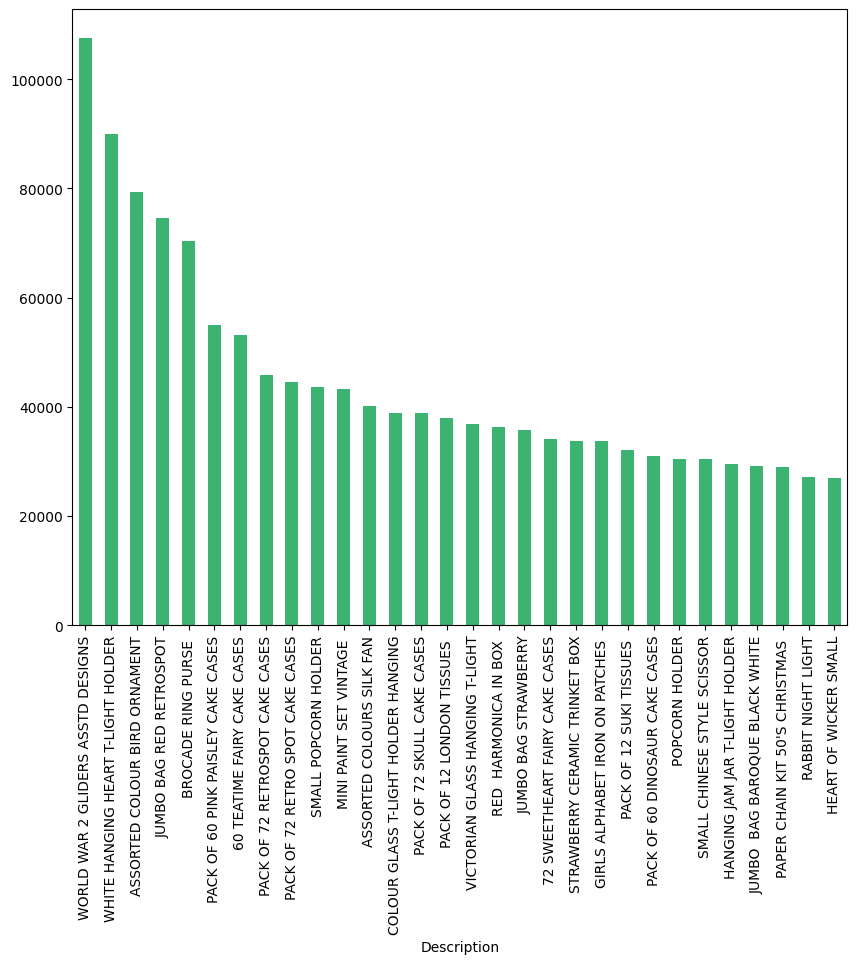

In [45]:
#Let's check which product has been purchased more often so far
plt.figure(figsize=(10,8))
data.groupby("Description")["Quantity"].sum().sort_values(ascending = False).head(30).plot(kind = "bar", color = 'mediumseagreen')

In [46]:
temp_data = data.copy()

In [47]:
temp_data.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [48]:
#Date Time Analysis
temp_data.loc[:, "Month"] = data.InvoiceDate.dt.month
temp_data.loc[:, "Time"] = data.InvoiceDate.dt.time
temp_data.loc[:, "Year"] = data.InvoiceDate.dt.year
temp_data.loc[:, "Day"] = data.InvoiceDate.dt.day
temp_data.loc[:, "Quarter"] = data.InvoiceDate.dt.quarter
temp_data.loc[:, "Day of Week"] = data.InvoiceDate.dt.dayofweek

In [49]:
#Mapping day of week
dayofweek_mapping = dict({0: "Monday",
                         1: "Tuesday",
                         2: "Wednesday" ,
                         3: "Thursday",
                         4: "Friday",
                         5: "Saturday",
                         6: "Sunday"})

In [50]:
temp_data["Day of Week"] = temp_data["Day of Week"].map(dayofweek_mapping)

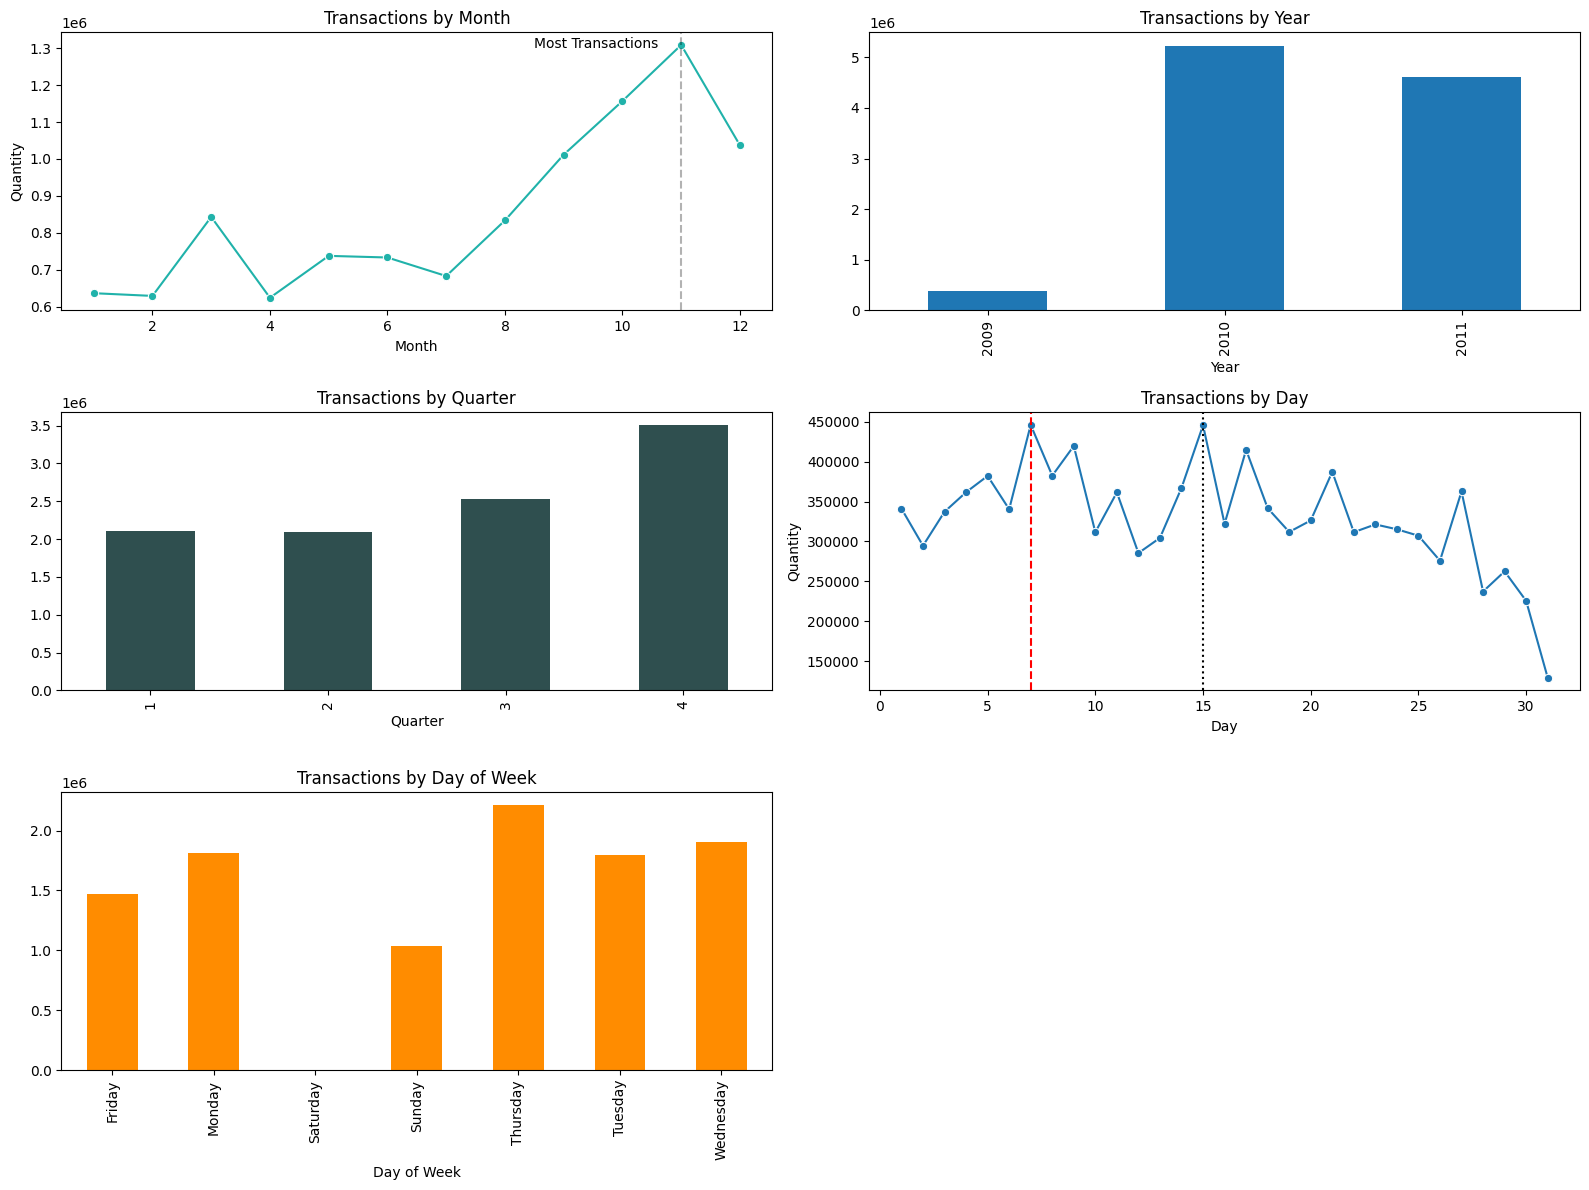

In [51]:
plt.figure(figsize=(16,12))
plt.subplot(3,2,1)
sns.lineplot(x = "Month", y = "Quantity", data = temp_data.groupby("Month")["Quantity"].sum().reset_index(), marker = "o", color = "lightseagreen")
plt.axvline(11, color = "k", linestyle = '--', alpha = 0.3)
plt.text(8.50, 1.3e6, "Most Transactions")
plt.title("Transactions by Month")
plt.subplot(3,2,2)
temp_data.groupby("Year")["Quantity"].sum().plot(kind = "bar")
plt.title("Transactions by Year")
plt.subplot(3,2,3)
temp_data.groupby("Quarter")["Quantity"].sum().plot(kind = "bar", color = "darkslategrey")
plt.title("Transactions by Quarter")
plt.subplot(3,2,4)
sns.lineplot(x = "Day", y = "Quantity", data = temp_data.groupby("Day")["Quantity"].sum().reset_index(), marker = "o", )
plt.axvline(7, color = 'r', linestyle = '--')
plt.axvline(15, color = 'k', linestyle = "dotted")
plt.title("Transactions by Day")
plt.subplot(3,2,5)
temp_data.groupby("Day of Week")["Quantity"].sum().plot(kind = "bar", color = "darkorange")
plt.title("Transactions by Day of Week")
plt.tight_layout()
plt.show()

As we can see, in 2009 the transactions is quite low as compared to 2010 and 2011. But as if now, we don't know the reason behind this so let's investigate why 2009 is low as compared to other 2 years.

In [52]:
print("Total Number of Countries in 2009: {}".format(len(temp_data[temp_data["Year"] == 2009]["Country"].unique())))
print("Total Number of Transactions in 2009: {}".format(temp_data[temp_data["Year"] == 2009]["Quantity"].sum()))
print("--------------------------------------------")
print("Total Number of Countries in 2009: {}".format(len(temp_data[temp_data["Year"] == 2010]["Country"].unique())))
print("Total Number of Transactions in 2009: {}".format(temp_data[temp_data["Year"] == 2010]["Quantity"].sum()))
print("--------------------------------------------")
print("Total Number of Countries in 2009: {}".format(len(temp_data[temp_data["Year"] == 2011]["Country"].unique())))
print("Total Number of Transactions in 2009: {}".format(temp_data[temp_data["Year"] == 2011]["Quantity"].sum()))

Total Number of Countries in 2009: 23
Total Number of Transactions in 2009: 390286
--------------------------------------------
Total Number of Countries in 2009: 37
Total Number of Transactions in 2009: 5233315
--------------------------------------------
Total Number of Countries in 2009: 36
Total Number of Transactions in 2009: 4610527


Through this analysis what conclusion we can make is that may be the company has started their operations in other countries and started to expand their business further.

In [53]:
_2009 = temp_data[temp_data["Year"] == 2009]["Country"].unique()
_2010 = temp_data[temp_data["Year"] == 2010]["Country"].unique()
_2011 = temp_data[temp_data["Year"] == 2011]["Country"].unique()

In [54]:
no_cols = []

for i in (_2010):
    if i not in _2009:
        no_cols.append(i)
print("These are the values which are not present in 2009: {}".format(no_cols))

These are the values which are not present in 2009: ['Unspecified', 'Nigeria', 'Malta', 'RSA', 'Singapore', 'Bahrain', 'Thailand', 'Israel', 'Lithuania', 'West Indies', 'Korea', 'Brazil', 'Canada', 'Iceland']


In [55]:
temp = data.groupby(["Country", "Description"])["Quantity"].sum()

In [56]:
temp = pd.DataFrame(temp)

### Top 8 Countries With Most Transactions

In [57]:
top_8_countries = ["United Kingdom", "Netherlands", "EIRE", "Denmark", "Germany", "France", "Australia", "Sweden"]

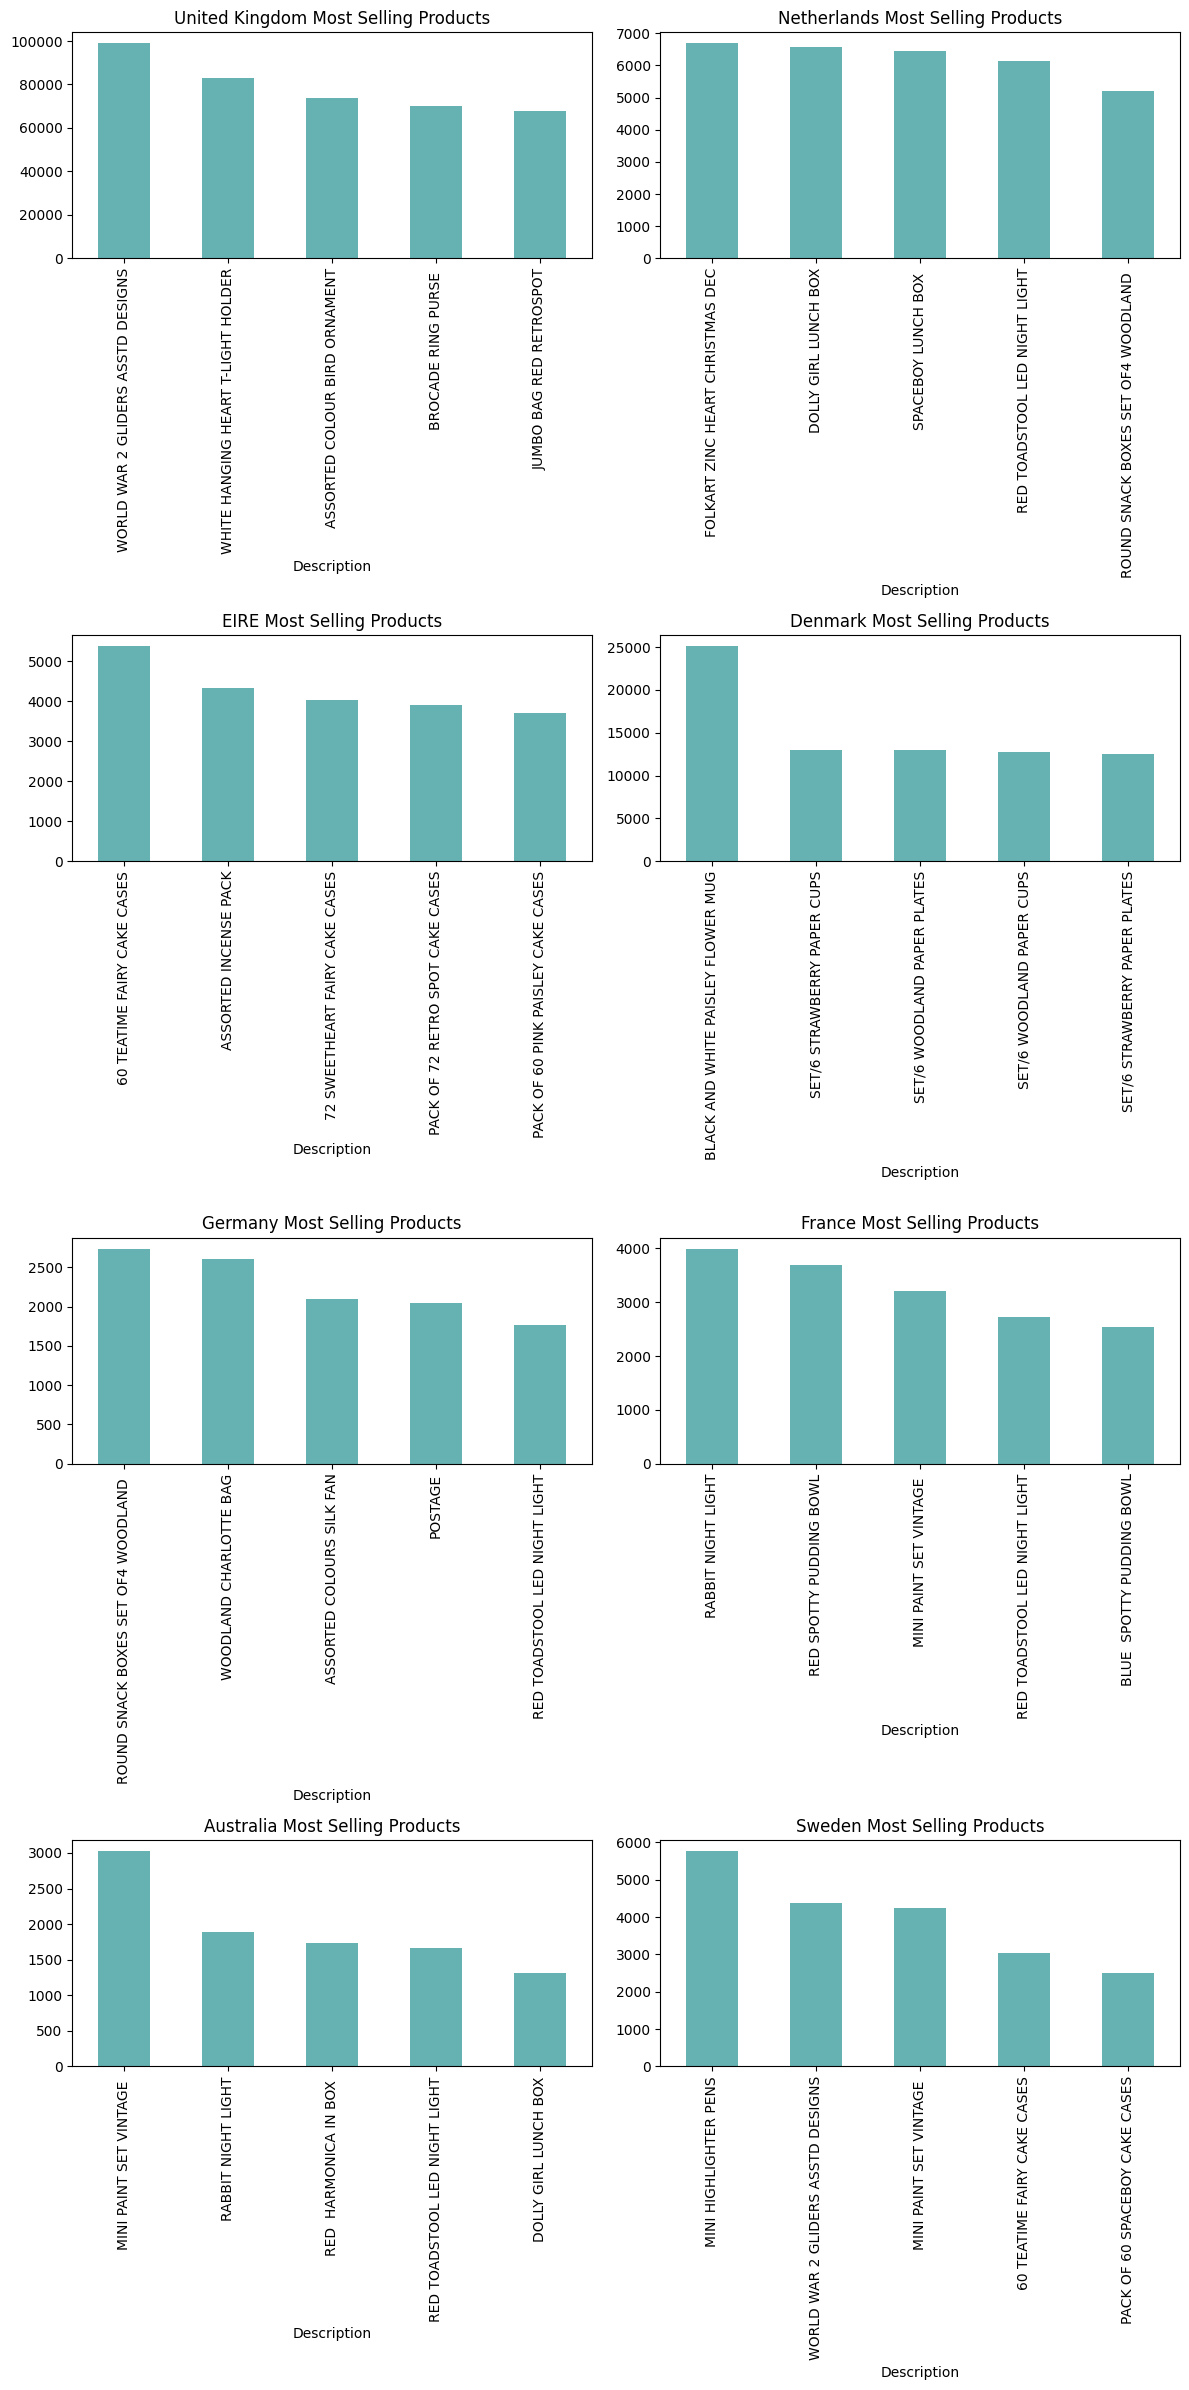

In [58]:
x = 1
plt.figure(figsize=(12,24))
for x, c in enumerate(top_8_countries):
    ax = plt.subplot(4,2, x+1)
    plt.title(c + ' '+ "Most Selling Products")
    temp.loc[c].sort_values(by = "Quantity", ascending = False)["Quantity"].head(5).plot(kind = "bar", ax = ax, color = "teal", alpha = 0.6)
    plt.tight_layout()

### Top 8 Countries with Least Transactions

In [59]:
least_8_country = ["Saudi Arabia", "Nigeria", "Lebanon", "West Indies", "European Community", "Brazil", "Czech Republic", "Korea"]

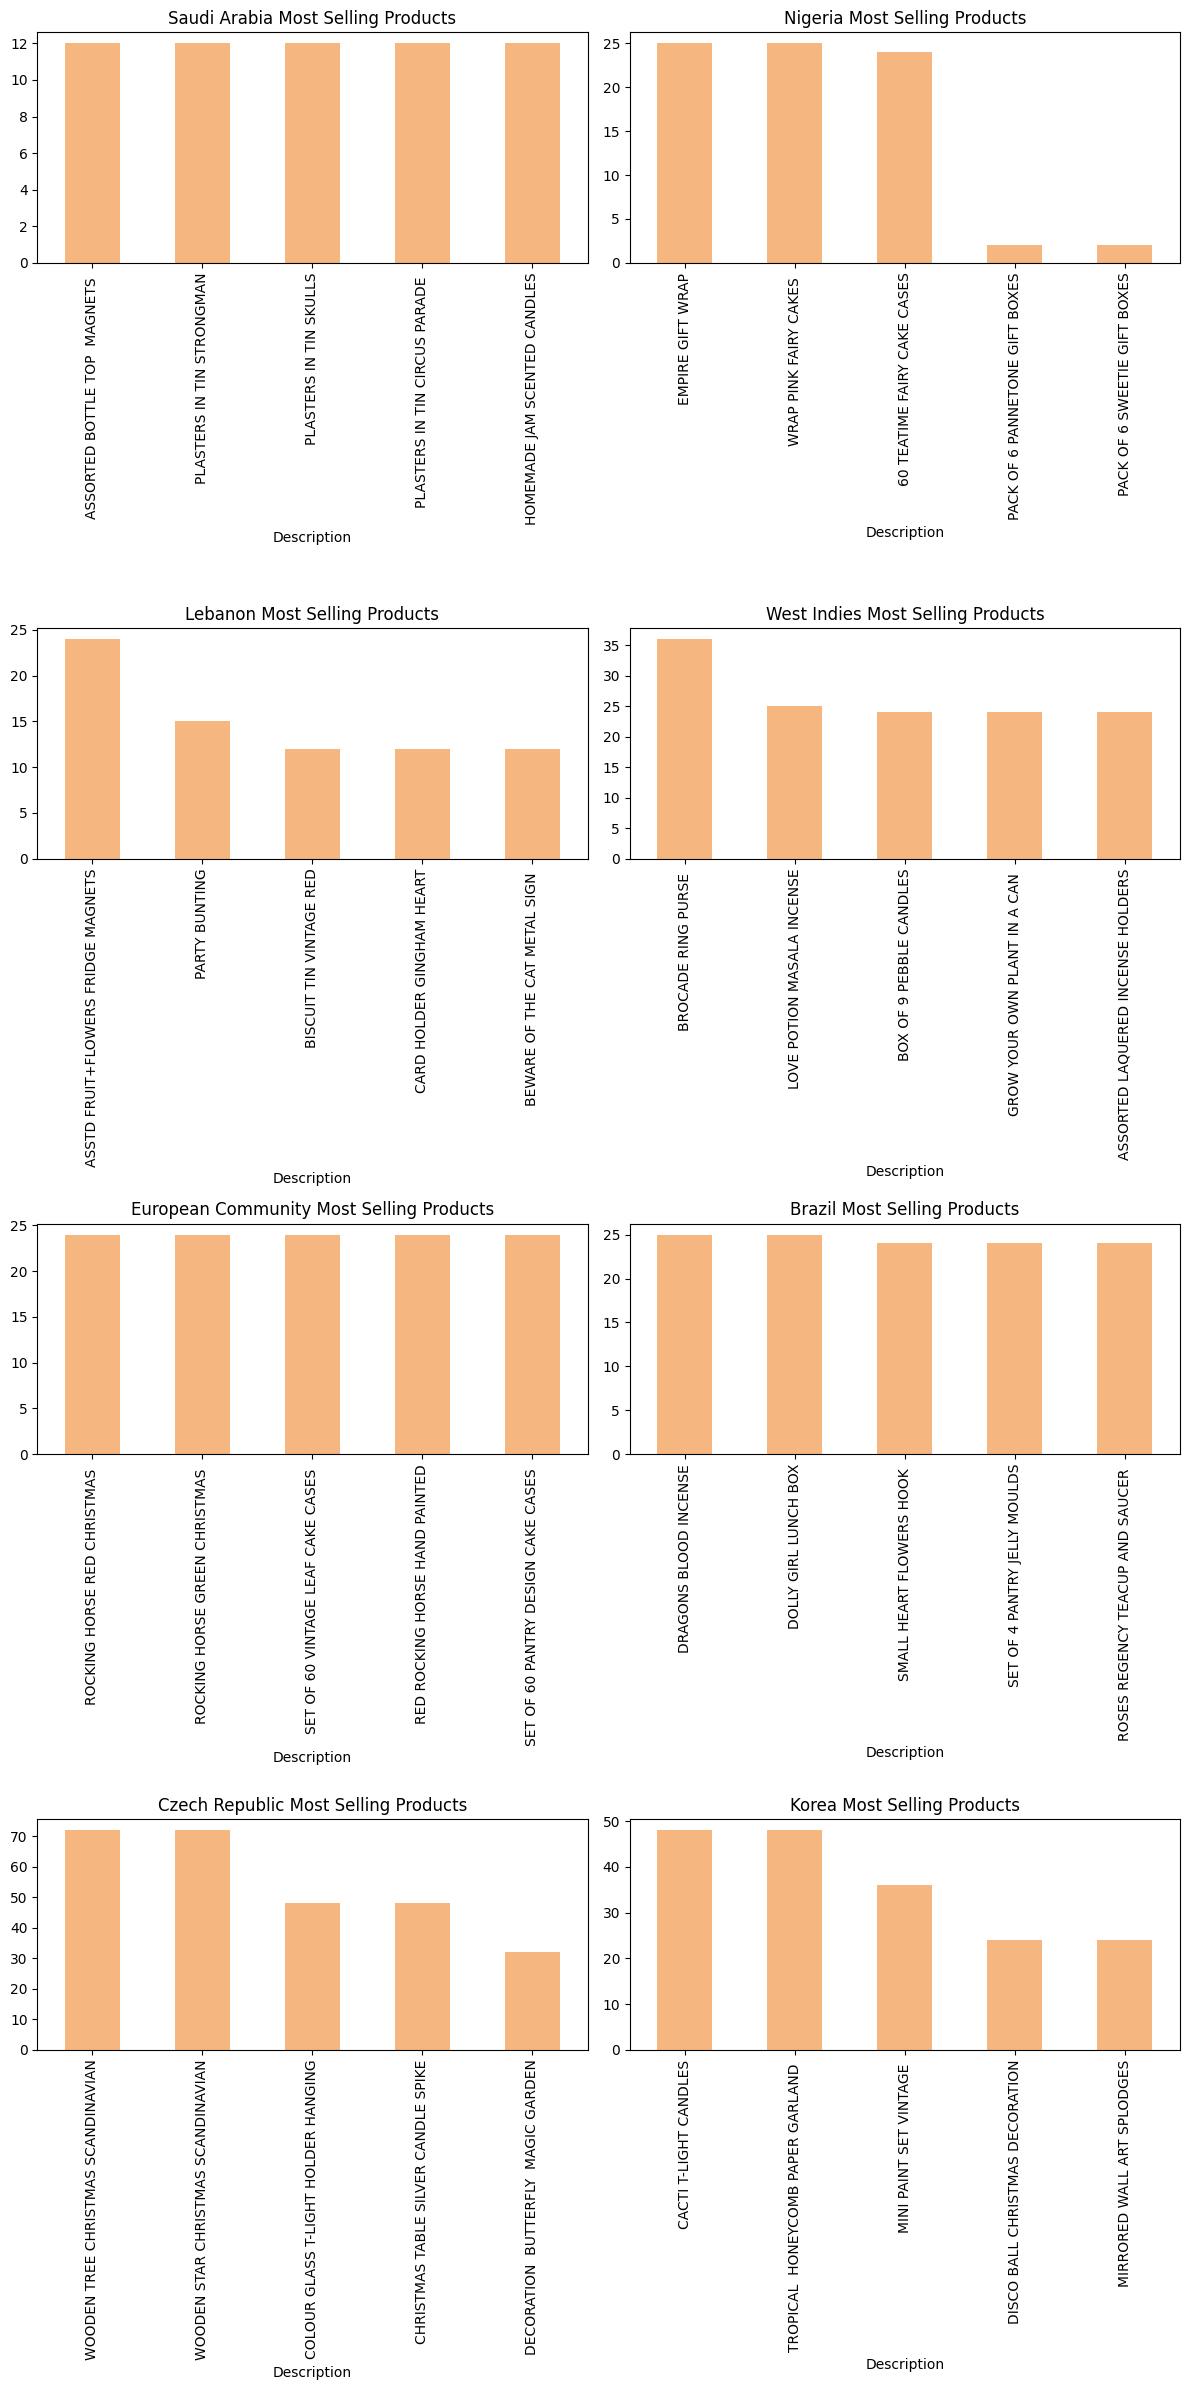

In [60]:
x = 1
plt.figure(figsize=(12,24))
for x, c in enumerate(least_8_country):
    ax = plt.subplot(4,2, x+1)
    plt.title(c + ' '+ "Most Selling Products")
    temp.loc[c].sort_values(by = "Quantity", ascending = False)["Quantity"].head(5).plot(kind = "bar", ax = ax, color = "sandybrown", alpha = 0.8)

    plt.tight_layout()

### **EDA INSIGHTS:**


1) Our Top 5 Best Selling Products are **World War 2 Gliders**, **White Hanging Heart**, **Assorted Colour Bird**, **Jumbo Bag Red**, **Brocade Ring**.

2) Most Transactions happened in the month of Novemeber which is evident due to festive seasons.

3) 2010 is the year in which we have the most transactions followed by the 2011

4) Q4 being the highest when it comes transactions.

5) It also observed that in the end of the 1st week and starting of the 3rd week, people tends to buy more.

6) People loves to shop on Thursday followed by Tuesday and Wednesday.
